In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.impute import SimpleImputer


In [2]:
file_path = 'credit_risk_dataset.csv'
credit_risk_df = pd.read_csv(file_path)


In [3]:
credit_risk_df.head()


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [4]:
print(credit_risk_df.describe())
print("\nMissing values in each column:\n", credit_risk_df.isnull().sum())


         person_age  person_income  person_emp_length     loan_amnt  \
count  32581.000000   3.258100e+04       31686.000000  32581.000000   
mean      27.734600   6.607485e+04           4.789686   9589.371106   
std        6.348078   6.198312e+04           4.142630   6322.086646   
min       20.000000   4.000000e+03           0.000000    500.000000   
25%       23.000000   3.850000e+04           2.000000   5000.000000   
50%       26.000000   5.500000e+04           4.000000   8000.000000   
75%       30.000000   7.920000e+04           7.000000  12200.000000   
max      144.000000   6.000000e+06         123.000000  35000.000000   

       loan_int_rate   loan_status  loan_percent_income  \
count   29465.000000  32581.000000         32581.000000   
mean       11.011695      0.218164             0.170203   
std         3.240459      0.413006             0.106782   
min         5.420000      0.000000             0.000000   
25%         7.900000      0.000000             0.090000   
50%   

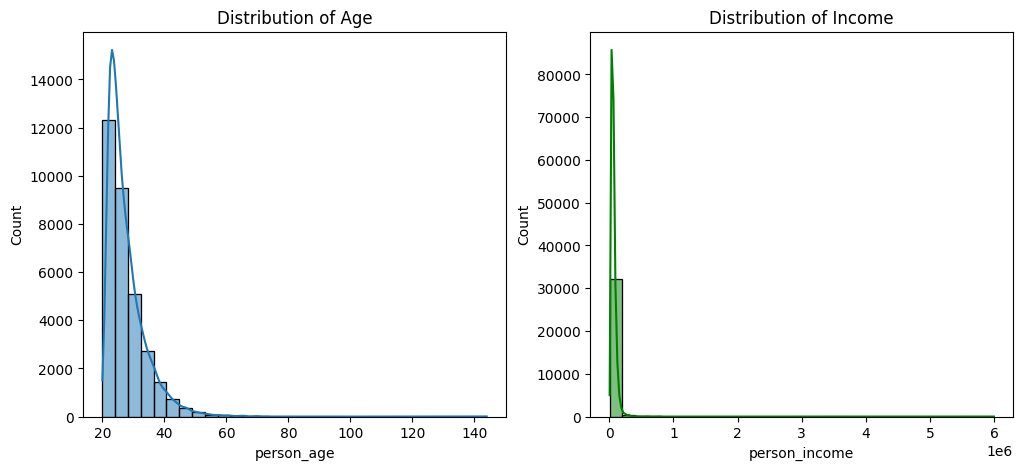

In [5]:
plt.figure(figsize=(12, 5))
plt.subplot(1,2,1)
sns.histplot(credit_risk_df['person_age'], bins=30, kde=True)
plt.title('Distribution of Age')
plt.subplot(1,2,2)
sns.histplot(credit_risk_df['person_income'], bins=30, kde=True, color='green')
plt.title('Distribution of Income')
plt.show()


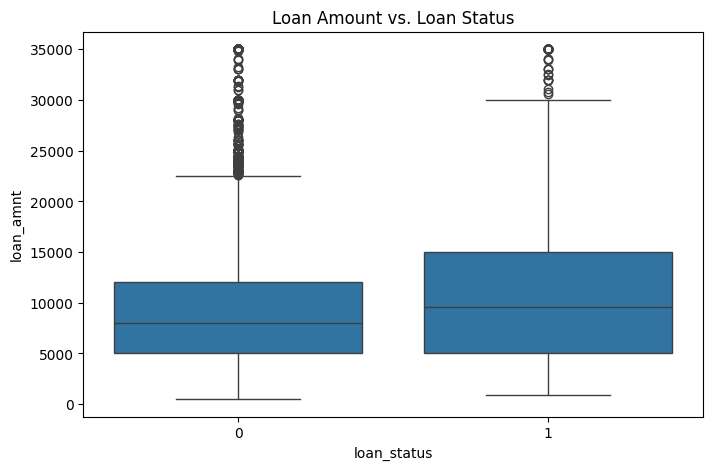

In [6]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='loan_status', y='loan_amnt', data=credit_risk_df)
plt.title('Loan Amount vs. Loan Status')
plt.show()


In [7]:
# Handling missing values
imputer = SimpleImputer(strategy='median')
credit_risk_df[['person_emp_length', 'loan_int_rate']] = imputer.fit_transform(credit_risk_df[['person_emp_length', 'loan_int_rate']])

# Removing outliers
credit_risk_df = credit_risk_df[(credit_risk_df['person_age'] >= 18) & (credit_risk_df['person_age'] <= 100)]
credit_risk_df = credit_risk_df[(credit_risk_df['person_emp_length'] >= 0) & (credit_risk_df['person_emp_length'] <= 60)]


In [8]:
credit_risk_df = pd.get_dummies(credit_risk_df, columns=['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file'], drop_first=True)


In [9]:
X = credit_risk_df.drop('loan_status', axis=1)
y = credit_risk_df['loan_status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [10]:
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train_scaled, y_train)
logistic_pred = logistic_model.predict(X_test_scaled)
print("Logistic Regression Accuracy:", accuracy_score(y_test, logistic_pred))
print(classification_report(y_test, logistic_pred))


Logistic Regression Accuracy: 0.8663085188027628
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      5099
           1       0.76      0.56      0.64      1416

    accuracy                           0.87      6515
   macro avg       0.82      0.75      0.78      6515
weighted avg       0.86      0.87      0.86      6515



In [11]:
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train, y_train)
decision_tree_pred = decision_tree_model.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, decision_tree_pred))
print(classification_report(y_test, decision_tree_pred))


Decision Tree Accuracy: 0.8947045280122794
              precision    recall  f1-score   support

           0       0.94      0.93      0.93      5099
           1       0.75      0.78      0.76      1416

    accuracy                           0.89      6515
   macro avg       0.84      0.85      0.85      6515
weighted avg       0.90      0.89      0.90      6515



Random Forest Accuracy: 0.9338449731389102
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      5099
           1       0.95      0.73      0.83      1416

    accuracy                           0.93      6515
   macro avg       0.94      0.86      0.89      6515
weighted avg       0.93      0.93      0.93      6515



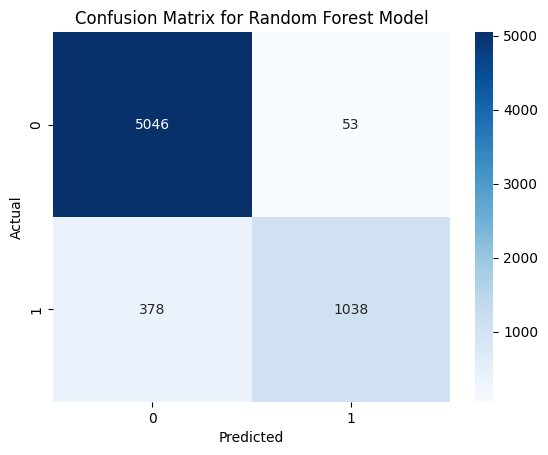

In [14]:
from sklearn.ensemble import RandomForestClassifier

# Building the Random Forest model
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_model.fit(X_train, y_train)  # No need for scaling in Random Forest
random_forest_pred = random_forest_model.predict(X_test)

# Evaluating the model
print("Random Forest Accuracy:", accuracy_score(y_test, random_forest_pred))
print(classification_report(y_test, random_forest_pred))

# Confusion Matrix for Random Forest Model
conf_mat = confusion_matrix(y_test, random_forest_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()


C:\Users\ORS\AppData\Local\Temp\ipykernel_13576\1045123053.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(credit_risk_df[credit_risk_df['loan_status'] == 0]['loan_amnt'], label='No Default', shade=True)
C:\Users\ORS\AppData\Local\Temp\ipykernel_13576\1045123053.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(credit_risk_df[credit_risk_df['loan_status'] == 1]['loan_amnt'], label='Default', shade=True)


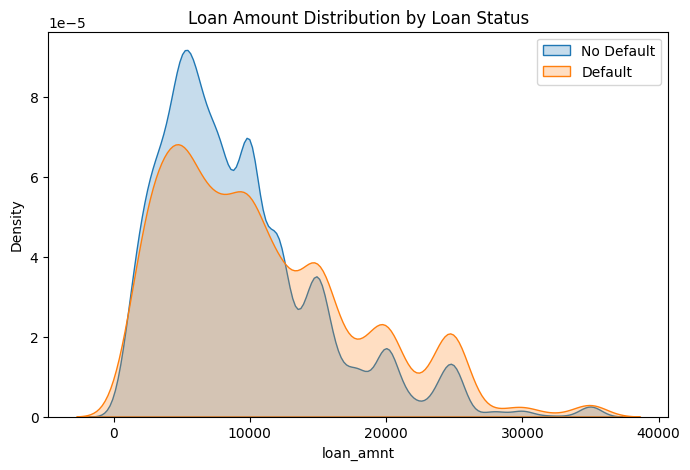

In [12]:
plt.figure(figsize=(8, 5))
sns.kdeplot(credit_risk_df[credit_risk_df['loan_status'] == 0]['loan_amnt'], label='No Default', shade=True)
sns.kdeplot(credit_risk_df[credit_risk_df['loan_status'] == 1]['loan_amnt'], label='Default', shade=True)
plt.title('Loan Amount Distribution by Loan Status')
plt.legend()
plt.show()
